<a href="https://colab.research.google.com/github/Linda-Agesa/Patient-Thyroisism-Analysis/blob/master/NH_Hypothyroidism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NH-Patient Hypothyroidism Analysis

## Context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 

## Problem Statement

>Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid using the following machine learning algoriths:
>
> ### 1. Decision Trees
We will use the following trees to classify a whether a patient has hypothyroididm or tests negatively:
> 
>- Random Forest Classifier
- AdaBoost Classifier
- Gradient Boost Classifier
>
> The Adaboost and Gradient boost trees are optimization techniques for the random forest trees.
>
> ### 2. SVM Models
> 
> We will use the following SVM models to to place a patient in the right category with regards to predicting their hypothyroidism status:
>- Polynomial
- Linear
- RBF


## Experimental Research Design
>True Experimental Research Design This is the methodology we will to use for this research >experiment.
>
>A true experiment research design is a type of experimental design used to test and reject or fail to reject a hypothesis by using statistical analysis as the means of investigation. This type of experiment can also be used to determine cause and effect relationships within groups.
>
>The following are the assumptions that must be satisfied in order to use the true experiment research design :
>
>- Control group and experimental group
- Researcher - manipulated variable(s)
- Random distribution

## Sampling Technique

> Random Forest ML Algorithm uses the bootstrap sampling technique by default.

## Metrics For Success

## Project Plan

> Being that this project is a classification problem, we will test each model using the accuracy score metric.

### Loading Libraries and Files

In [0]:
# Loading the libraries needed for our workflow

import pandas as pd 
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


In [0]:
# Loading the data file

thyroidism = pd.read_csv('hypothyroid.csv')

#### Displaying the data

In [185]:
# Displaying the first five records of the data

thyroidism.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [186]:
thyroidism.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


## Analysis

In [187]:
# Getting a general description of the data

thyroidism.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


>- The unique values report represents the cardinality of the features. The following columns TSH, TT4, T4U and FTI have a large number of unique values hence high cardinality. In comparison to the number of columns we will ignore the cardinality as the cardinality in relation to the number of columns is low meaning the columns provide a variation of values hence we can gain information from these columns.
>- The top report represents the value of the mode of each feature while the frequency report gives the number of times this values occurs.
- We notice the presence of question marks(?) across a number of columns(namely : age, T3, TT4, T4U, FTI, TBG) to represent missing values in the dataset.
- By the description we have obtained, we can infer that all our columns are categorical in nature/ the column datatypes are objects.
- We can confirm this by checking the column datatypes in the next step.

In [188]:
# Now we check for the datatypes of our columns

thyroidism.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

- We have confirmed that all the column have the object datatype.

In [189]:
# Checking for the unique values in the dataset
# We will use a for loop to iterate through the different columns
#

for x in thyroidism.columns:
  
  print(x)
  print(thyroidism[x].unique(),'\n')

status
['hypothyroid' 'negative'] 

age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93'] 

sex
['M' 'F' '?'] 

on_thyroxine
['f' 't'] 

query_on_thyroxine
['f' 't'] 

on_antithyroid_medication
['f' 't'] 

thyroid_surgery
['f' 't'] 

query_hypothyroid
['f' 't'] 

query_hyperthyroid
['f' 't'] 

pregnant
['f' 't'] 

sick
['f' 't'] 

tumor
['f' 't'] 

lithium
['f' 't'] 

goitre
['f' 't'] 

TSH_measured
['y' 'n'] 

TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35

>- The following columns: age, sex, TSH, T3, TT4, T4U, FTI and TBG have question marks(?) as row values indicating the presence of missing values in our data.

### Dealing with Duplicate Values

In [190]:
# Lets check for the shape of our dataset

print('Our dataset has ', thyroidism.shape[0], 'rows and ', thyroidism.shape[1], 'columns')

Our dataset has  3163 rows and  26 columns


In [191]:
# Checking for duplicate records in our data

print('The dataset has ', thyroidism.duplicated().sum(), 'duplicated values')

The dataset has  77 duplicated values


>- The presence of duplicate values creates noise in our data. We will drop these records before proceeding.

In [0]:
# Deleting the duplicates

thyroidism.drop_duplicates(keep = 'first', inplace = True)

In [193]:
# Confirrming that the duplicate row has been dropped, we check the shape again

print('We now have ', thyroidism.shape[0], 'rows and ', thyroidism.shape[1], 'columns')

We now have  3086 rows and  26 columns


### Checking for null values

In [194]:
thyroidism.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

>- When we check for missing values at this point, they are not detected even though we had earlier established the presence of question marks as row values in our dataset that indicate missing or unrecorded values.
>- Python does not recognize the question marks as missing values hence we will have to replace the the question marks(?) with null values that can be recognized by python. We will do that in the next step.

In [0]:
# Replacing the question marks as null values

variables =  ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

# We then use a for loop to iterate through the columns listed above and apply the function to the columns
# where question marks are present and replace them as null values

for i in variables:
  thyroidism[i] = thyroidism[i].map(lambda x: np.nan if x == '?' else x)

In [196]:
# Now we check for null values to confirm that the question marks have been replaced successfully

thyroidism.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

>- Wonderful! Now we have a clear depiction of the missing values present in the data
>- TBG has a 2835 missing values out of 3162 rows
>- We will keep the null values in place for now and explore the data.
>We will also model the trees with the missing values in place for now because regression and classification trees algorithms can use missing values as unique and different values when building the predictive model.
> As for the SVM modeling, we will first deal with the missing values before proceeding to build the predictive models.

###  Converting Feature Datatypes

In [197]:
thyroidism.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [198]:
# As earlier confirmed, all the features are recorded as object datatypes.
# We will now classify and group the numerical features and the categorical 
# and change the datatypes.
numeric = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for col in numeric:
  thyroidism[[col]] = thyroidism[[col]].apply(pd.to_numeric)

thyroidism.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

- We have changed the numeric feature datatypes successfully.

## Univariate EDA

###Non-Graphical Analysis

> For non-graphical univariate EDA, we will carry out the following computations:
>
> - Measures of Central tendencies:
>      - For the numerical features we will calculate:
      - Mean
      - Mode
      - Median.
     -For categorical features we calculate the mode 

#### Measures of Central Tendency

In [199]:
# Calculating the mean of the numeric features

for col in numeric:
  print(thyroidism[[col]].mean())

age    51.112538
dtype: float64
TSH    5.80932
dtype: float64
T3    1.933666
dtype: float64
TT4    108.706922
dtype: float64
T4U    0.977559
dtype: float64
FTI    115.48908
dtype: float64
TBG    31.07012
dtype: float64


In [200]:
# Determining the mode of each of the numeric features

for col in numeric:
  print(thyroidism[[col]].mode())

    age
0  59.0
   TSH
0  0.0
    T3
0  1.6
1  1.8
    TT4
0  98.0
    T4U
0  0.98
    FTI
0  98.0
    TBG
0  21.0
1  23.0
2  25.0
3  28.0


> - T3 is a bimodal feature having the mode values 1.6 and 1.8
- TBG is a multimodal feature with the mode values 21, 23, 25 and 28

In [201]:
# Identifying the median 

for col in numeric:
  print(thyroidism[[col]].median())

age    54.0
dtype: float64
TSH    0.7
dtype: float64
T3    1.8
dtype: float64
TT4    104.0
dtype: float64
T4U    0.96
dtype: float64
FTI    107.0
dtype: float64
TBG    28.0
dtype: float64


#### Measures of Dispersion

In [202]:
# InterQuartile Range (IQR)
# IQR is also called the midspread or middle 50%

# Calculating IQR for the numeric features

for i in numeric:

  Q1 = thyroidism[i].quantile(0.25)
  Q3 = thyroidism[i].quantile(0.75)
  IQR = Q3 - Q1
  print(i, ':', IQR)






age : 32.0
TSH : 2.2
T3 : 0.8999999999999999
TT4 : 44.0
T4U : 0.21000000000000008
FTI : 38.0
TBG : 12.5


### Graphical Analysis

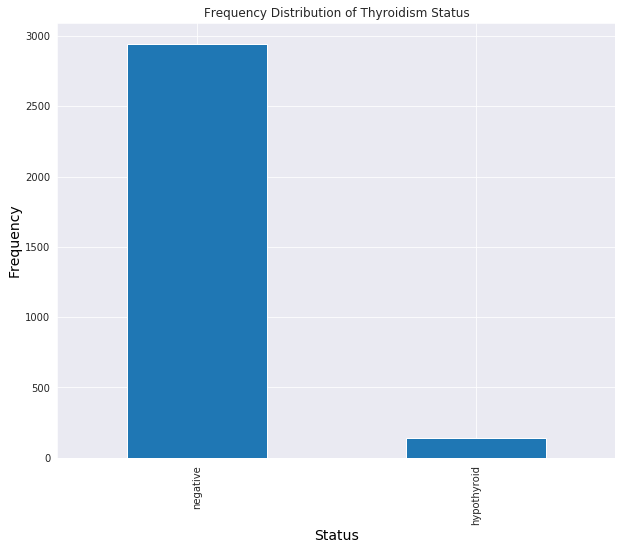

In [203]:
# Checking for the frequency distribution of our target variable Using a bar plot.

fig, ax = plt.subplots(figsize = (10, 8))

thyroidism['status'].value_counts().plot.bar(title = 'Frequency Distribution of Thyroidism Status')
plt.xlabel('Status', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

> - From the data, most of the sampled patients(about 2900 patients) tested negative to having hypothyroidism while less than 500 patients were confirmed to have hypothyroidism.

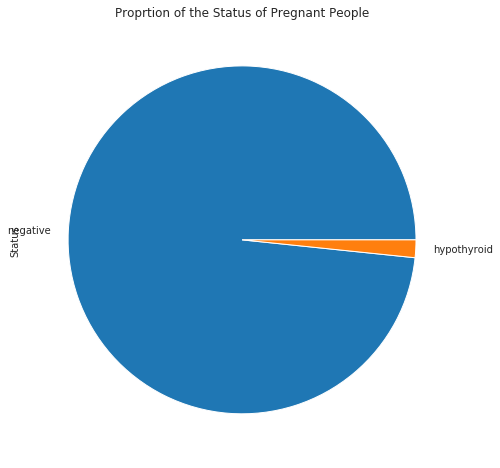

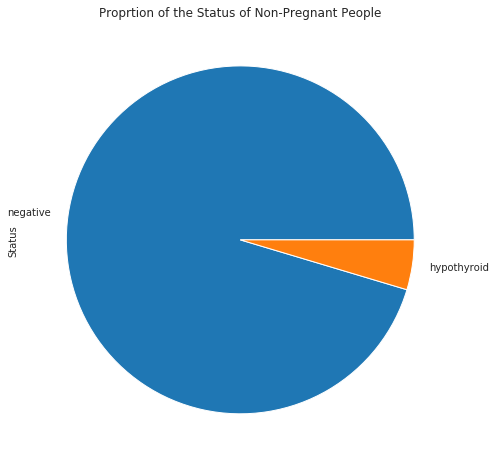

In [204]:
# Investigating the proportion of status of the patients who are pregnant and those that are not.

fig, ax = plt.subplots(figsize = (12, 8))

thyroidism[thyroidism['pregnant'] == 't']['status'].value_counts().plot.pie(title = 'Proprtion of the Status of Pregnant People')
plt.ylabel('Status')
plt.show()


fig, ax = plt.subplots(figsize = (12, 8))
thyroidism[thyroidism['pregnant'] == 'f']['status'].value_counts().plot.pie(title = 'Proprtion of the Status of Non-Pregnant People')
plt.ylabel('Status')
plt.show()

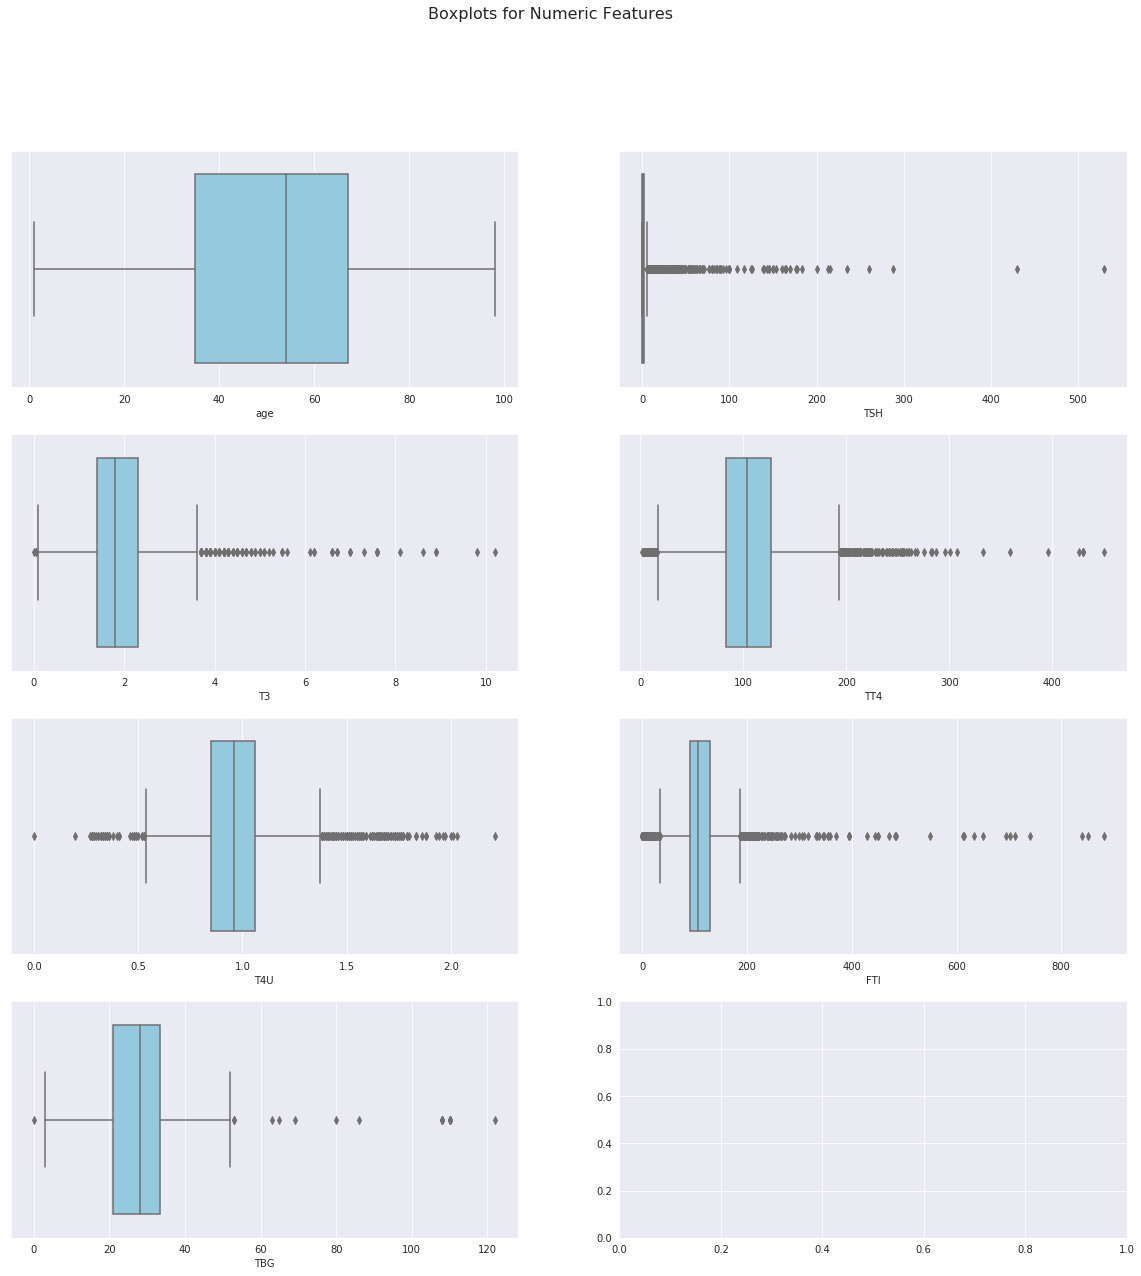

In [205]:
# For the purpose of imputing missing values later, we will use boxplots to detect the presence of outliers in the features
# 

sns.set_style('darkgrid')

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 20))
for ax, data, name in zip(axes.flatten(), thyroidism, numeric):
  sns.boxplot(thyroidism[name], color = 'skyblue', ax = ax)
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

> - From the boxplot above, we observe that the all the numerical columns contain outliers except for the age column.
> - The presence of outlier is condition that heavily affects the imputation of missing values. If present, it is better to impute missing values of numeric features with the median as the median is not affected by outliers in place of the mean which is heavily influenced by the presence of outliers.


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


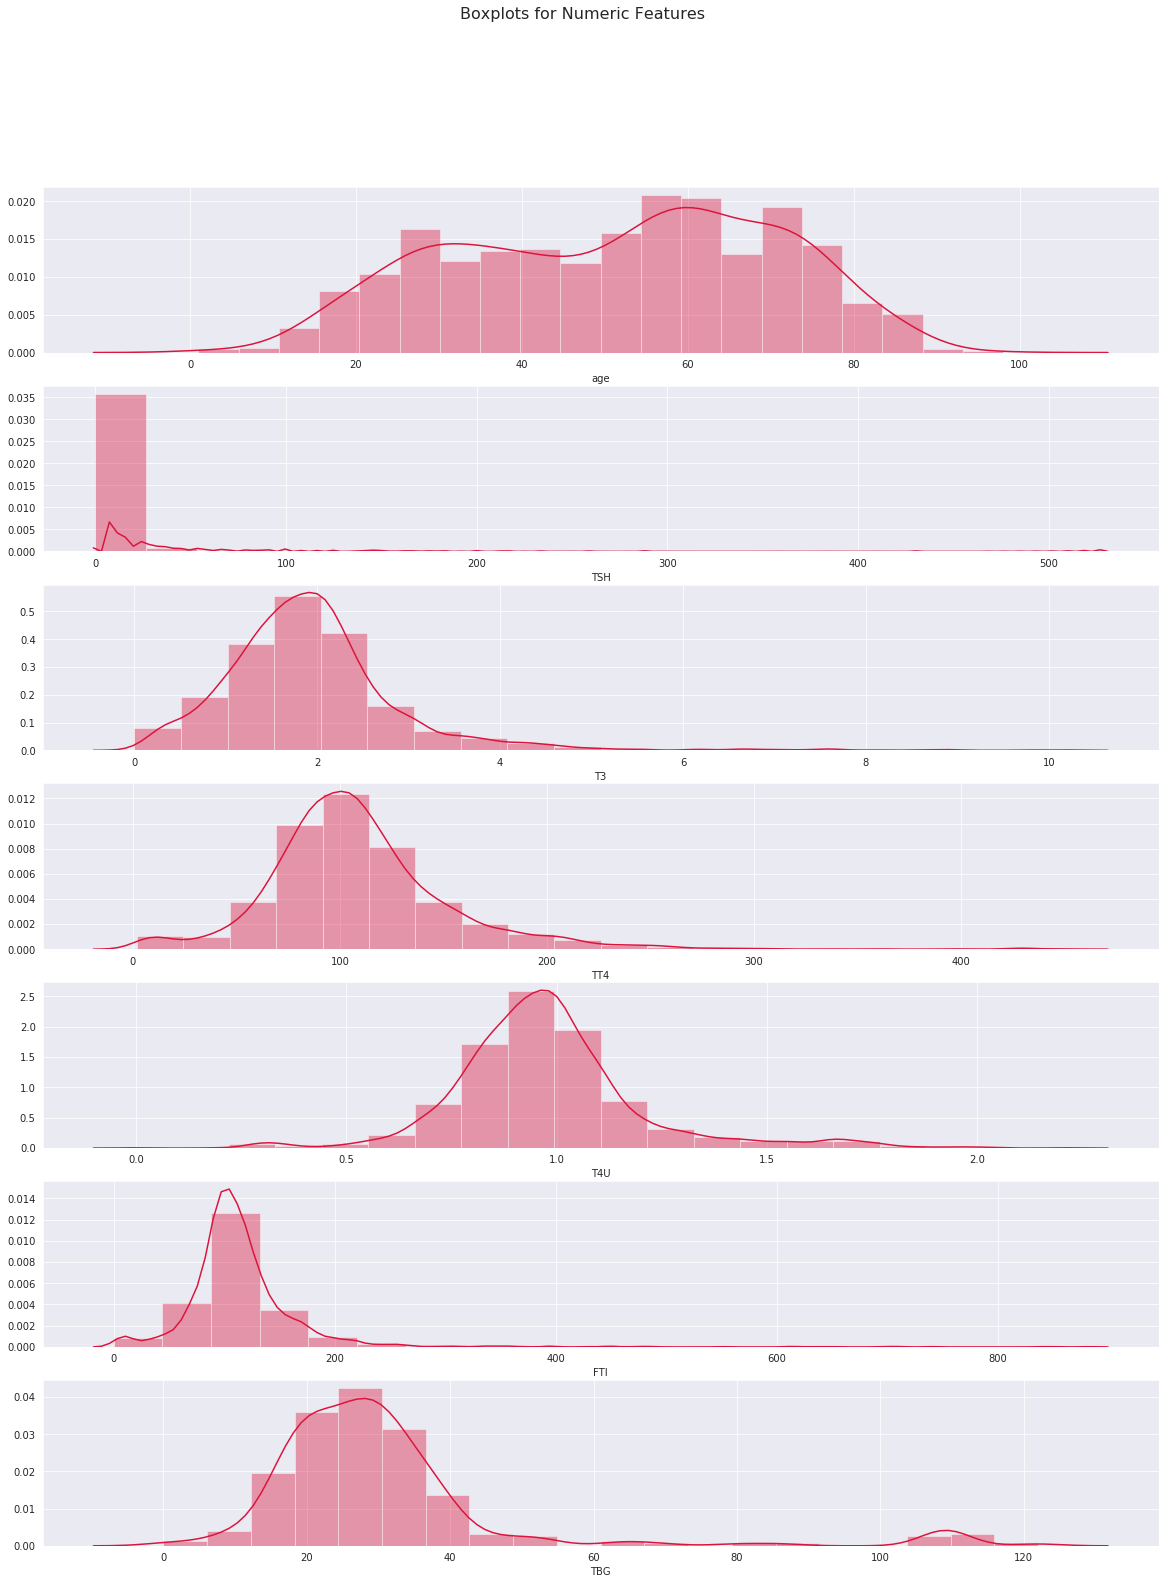

In [206]:
# Distribution Plots
# Now let us create plots to check for the distribution of the numeric features of our data

fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (20, 25))

for ax, name, data in zip(axes.flatten(), numeric, thyroidism):
  sns.distplot(thyroidism[name], hist = True, ax = ax, bins = 20, color = 'crimson')
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

### Bivariate EDA
> The aim of bivariate EDA is to determine if a relationship exists between the given features of our data. More more importantly, bivariate analysis helps us to determine is there is a relationship between the dependent variable and the various independent variables.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


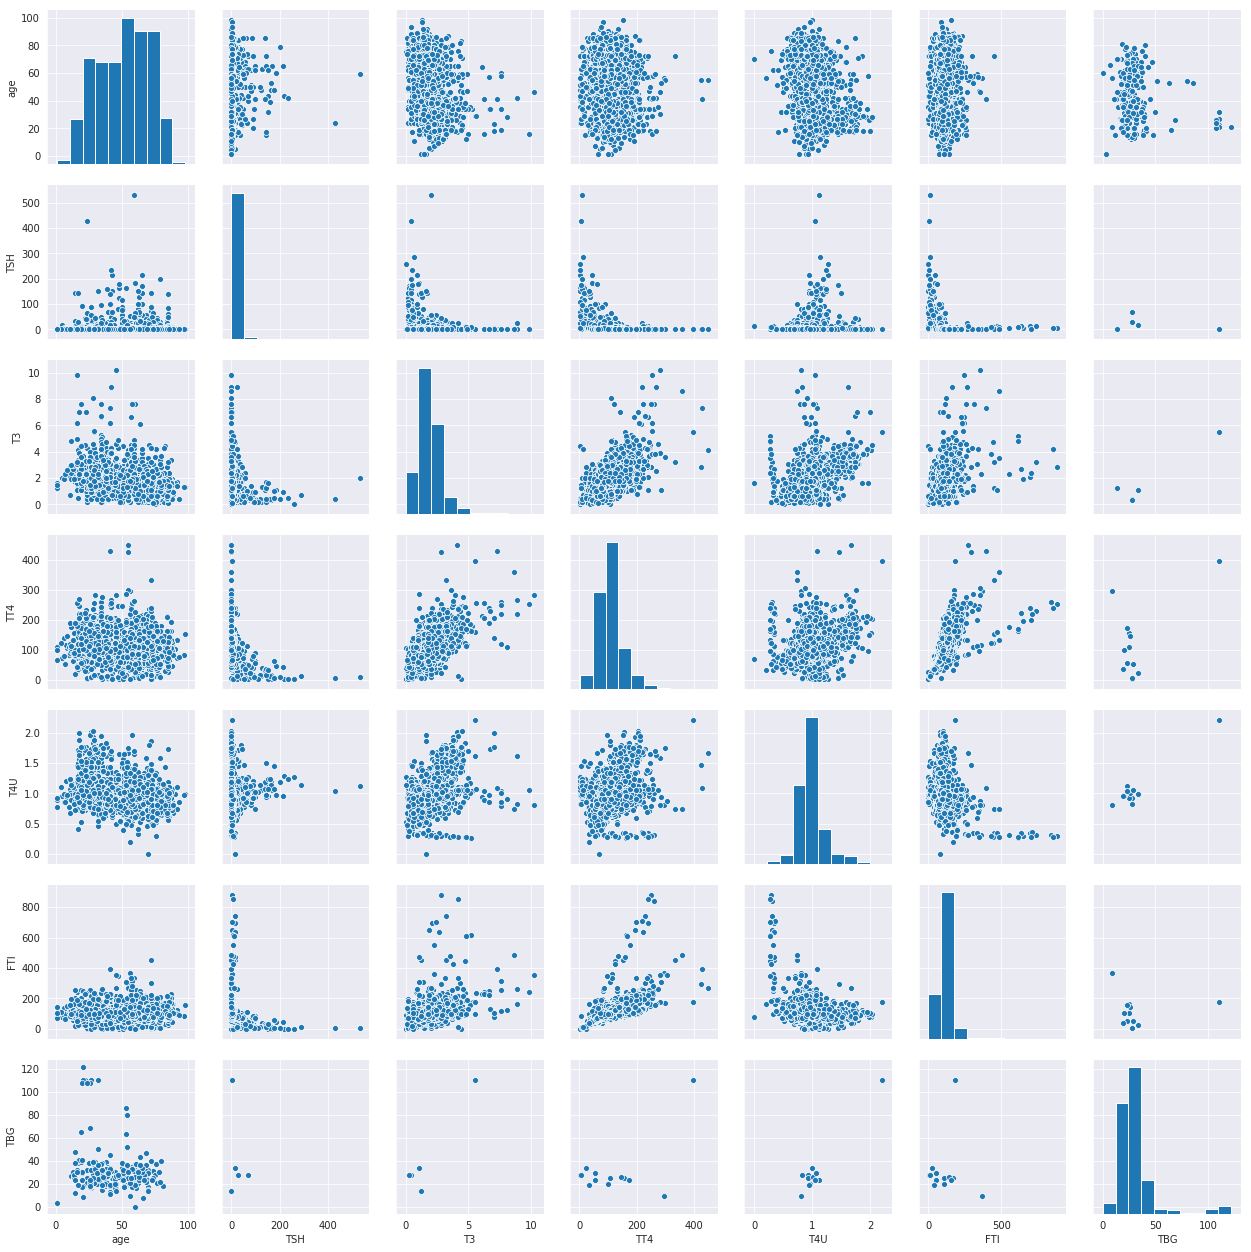

In [207]:
# Use of a pairplot to check for correlation between variables.

sns.pairplot(thyroidism, kind = 'scatter', dropna = False)
plt.show()

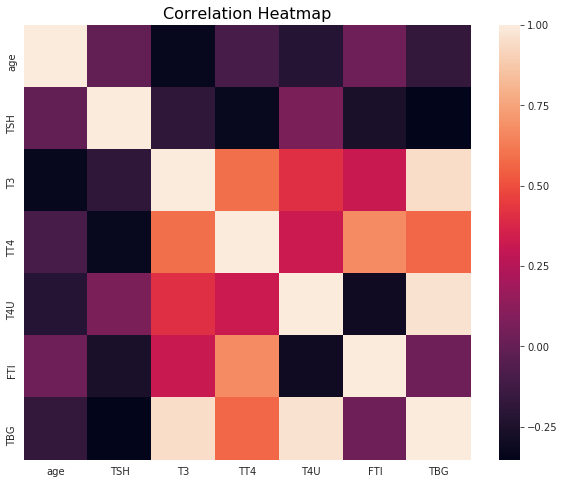

In [208]:
# Creating a heatmap to visualize the degree of correlation between variables

corr = thyroidism.corr()

fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(corr,
          xticklabels = corr.columns.values,
          yticklabels = corr.columns.values)
plt.title('Correlation Heatmap', color = 'black', fontsize = 16)
plt.show()

### Dealing with Missing Values

>- For the classification model using random trees, since trees are not affected by missing values, we will not impute the missing values with estimates of the features, instead we will classify the missing values as missing in categorical data and 0 in the numeric features so as to maintain the integrity of the raw data.

In [0]:
# Filling the missing values of numeric features

for col in numeric:
  thyroidism.fillna(0, inplace = True)
  
# For categorical features

cat =  ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium',
       'goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']

for i in cat:
  thyroidism.fillna('missing', inplace = True)

In [210]:
# Now checking for missing values

thyroidism.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## Fitting the Solution

###Random Forest

In [211]:
thyroidism.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0


In [0]:
# Selecting the independent and target variables
X = thyroidism.drop('status', axis = 1)

y = thyroidism.status

X = pd.get_dummies(X, columns = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'] )

In [213]:
X.head()

,age,TSH,T3,TT4,T4U,FTI,TBG,sex_0,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,72.0,30.0,0.6,15.0,1.48,10.0,0.0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,15.0,145.0,1.7,19.0,1.13,17.0,0.0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,24.0,0.0,0.2,4.0,1.00,0.0,0.0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,24.0,430.0,0.4,6.0,1.04,6.0,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,77.0,7.3,1.2,57.0,1.28,44.0,0.0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [214]:
# SPlitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Modeling

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

comparison_frame.head(10)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Actual,Predicted
597,negative,negative
1990,negative,negative
1430,negative,negative
2632,negative,negative
2644,negative,negative
2417,negative,negative
29,hypothyroid,negative
2833,negative,negative
2941,negative,negative
2723,negative,negative


In [215]:
# Evaluating the model

# Assessing the errors
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9870410367170627


In [216]:
forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [217]:
# Hyperparameter tuning the RandomForestClassifier

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [10, 40, 50, 60, 100], 'min_samples_split':[2, 3, 8, 7, 6, 4, 5, 9], 'max_depth' : [1,3,4,5,8], 'criterion' : ['gini','entropy']}

forest = RandomForestClassifier()

search = GridSearchCV(forest, scoring = 'accuracy', param_grid=params, cv = 10)

search.fit(X, y)

search.best_params_



{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 2,
 'n_estimators': 60}

In [219]:
# Fitting the best parameters to the model and observe the performance

forest = RandomForestClassifier(n_estimators = 60, criterion = 'entropy', max_depth = 8, min_samples_split = 4)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)


# Evaluating the model performance
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9892008639308856


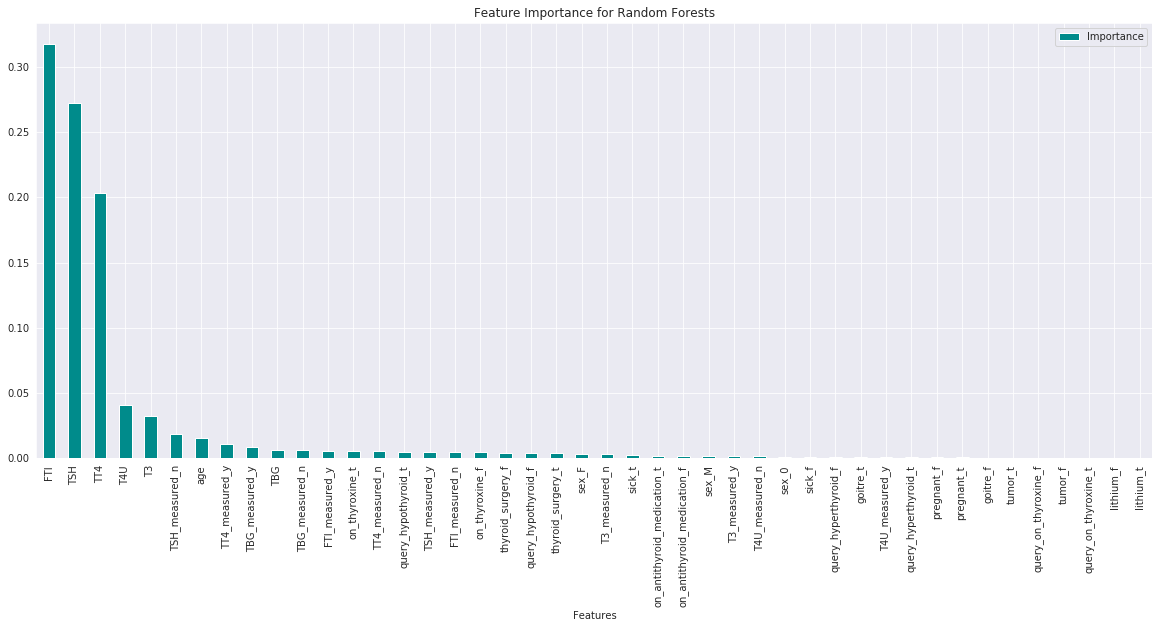

In [225]:
# Getting the feature importance



pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'darkcyan')
plt.show()

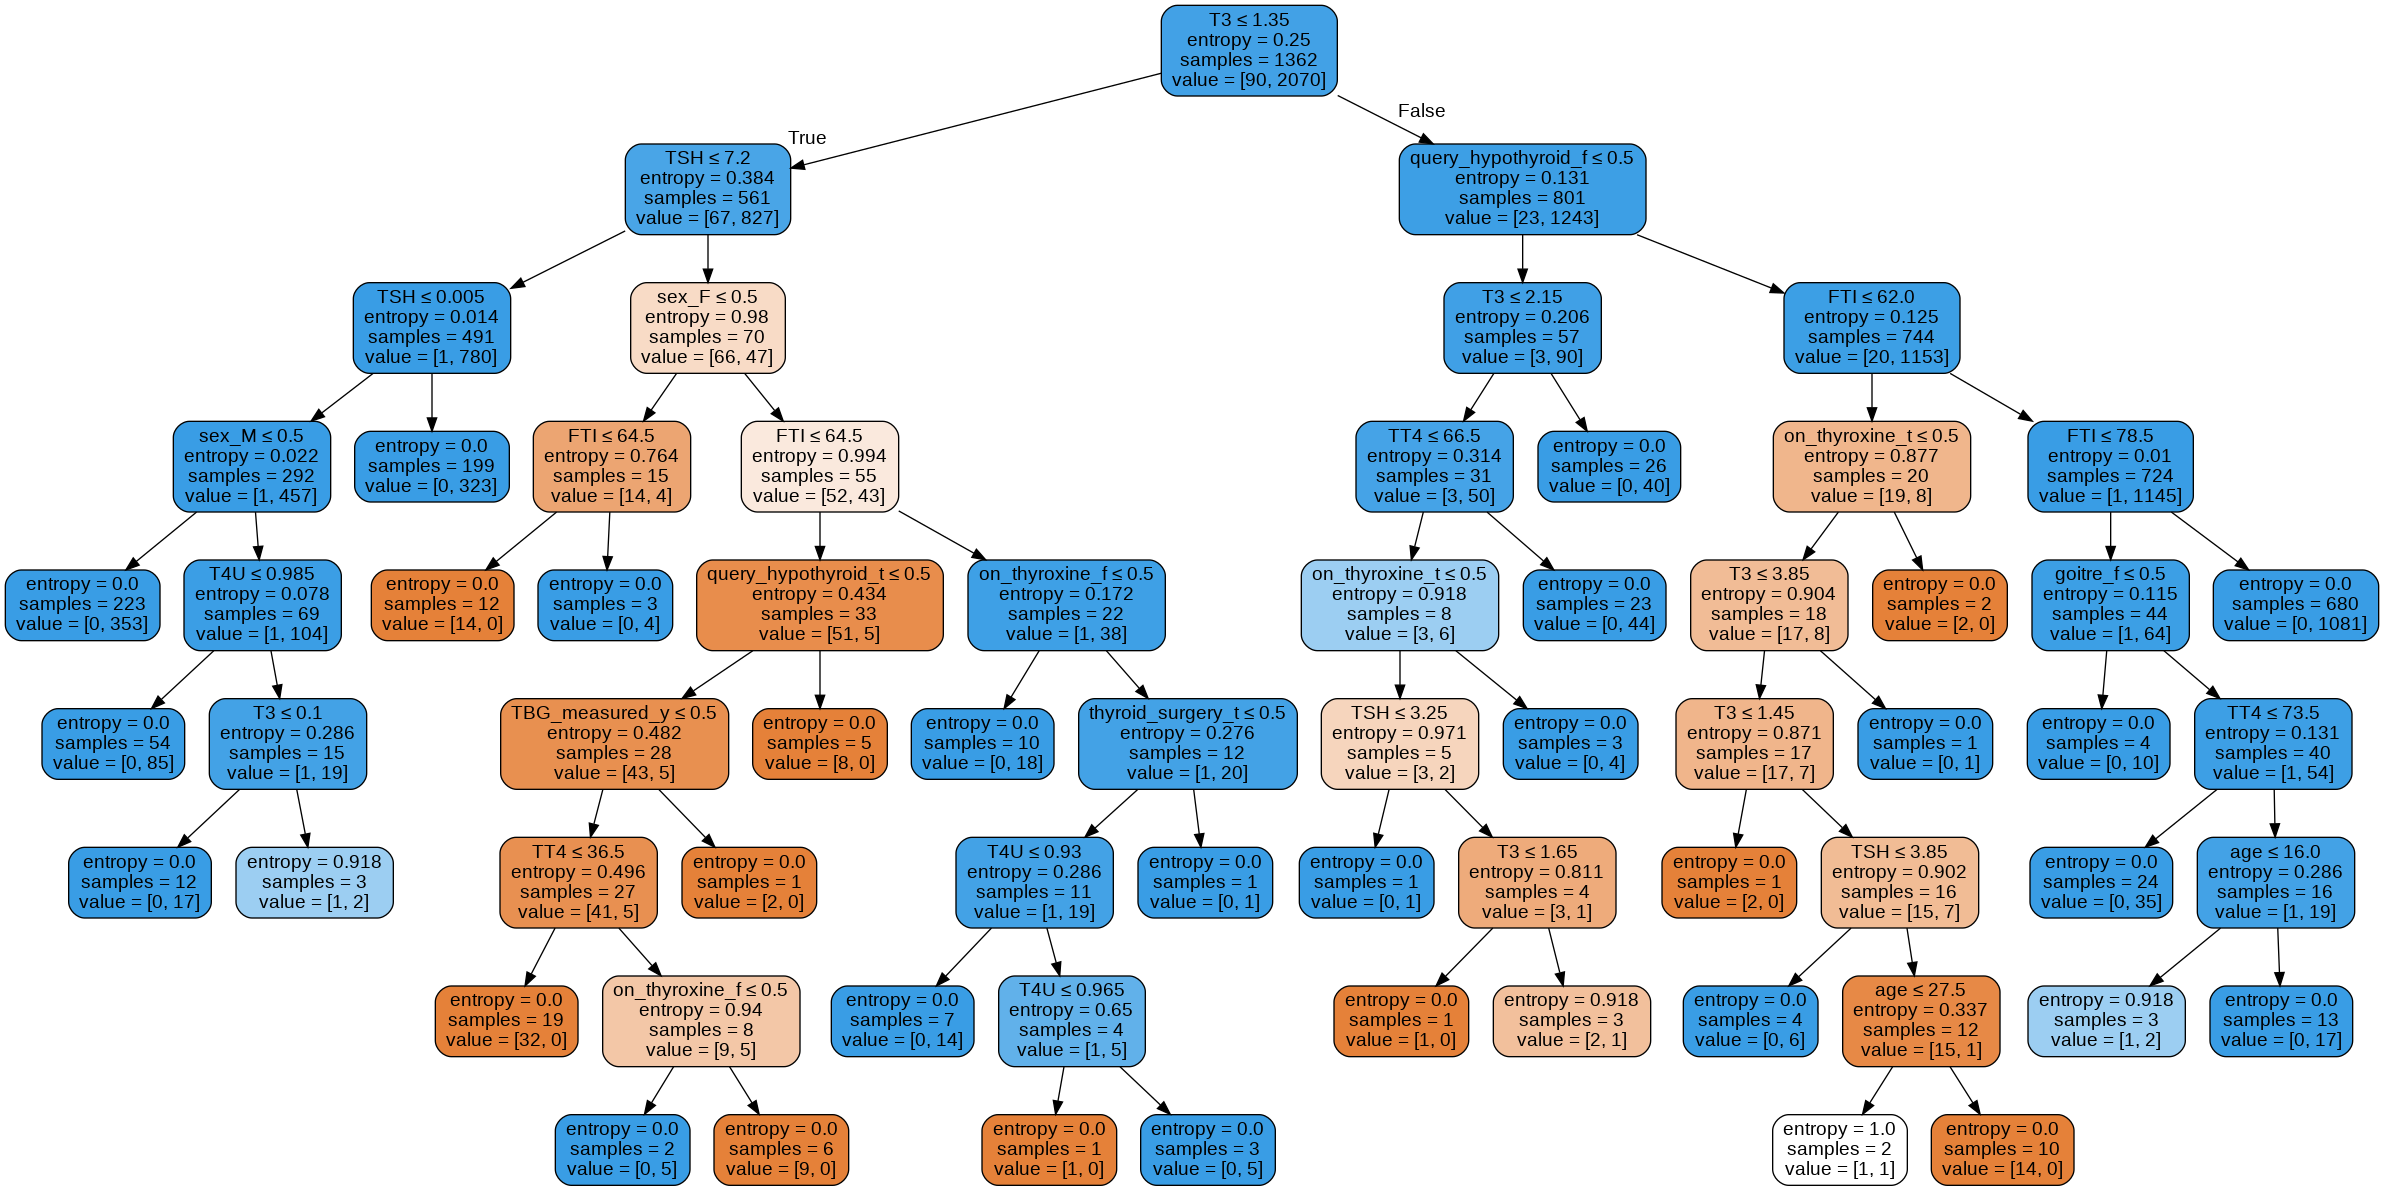

In [228]:
# Visualizing a tree from the random forest

dot_data = StringIO()

# Picking a specific tree from the forest
my_tree = forest.estimators_[33]

export_graphviz(my_tree, out_file = dot_data, filled = True, rounded = True,
              special_characters = True, feature_names = X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

#### Adaboost Trees

- Optimizing the RandomForestClassifier Using Adaboost



In [0]:
#Adaboost Trees

ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 4),
                          n_estimators=300, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)


In [230]:
# Checking the accuracy of the prediction

print("Accuracy:", metrics.accuracy_score(y_test, ada_pred))



Accuracy: 0.9892008639308856


#### Hyperparameter Tuning the Adaboost Trees

In [0]:
params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid=params, cv = 10)

search.fit(X, y)

search.best_params_



{'n_estimators': 300}

- There is no need to tune the parameter as the one that we first used gives the optimal prediction.

#### Gradient Boost Trees

In [0]:
# Fitting the gradient boosting classifier and making predictions

gbc = GradientBoostingClassifier(n_estimators = 300, learning_rate=0.1, max_depth=2)
gbc = gbc.fit(X_train, y_train)

gbc_pred = gbc.predict(X_test)


In [0]:
# Checking the performance of the GBC model


print("Accuracy:", metrics.accuracy_score(y_test, gbc_pred))



Accuracy: 0.9924406047516199


- The accuracy of the trees has increased to 99%.

## SVM Model

- Feature selection: We will use the FTI and TSH columns because they are the features with the highest importance.

In [0]:
thyroidism.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [0]:
# Selecting the independent variables and the target variable
#
X = thyroidism[['FTI', 'TSH']]
y =thyroidism['status']


# Defining the various SVM models to use for classification

pol = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names

model = [pol, linear, rbf]
names = ['Polynomial', 'Linear', 'RRBF']


# Creating a function that will fit the data and train it, predict using the test features and give an accuracy score for each model
# We will pass the model, the independent and dependent variables as our function parameters

def SVM(model, X, y):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # Splitting the data into training and testing sets
  sc = StandardScaler()  # Standardising our data
  
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  model.fit(X_train, y_train) # Training the model and making predictions
  
  y_pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)# Evaluating the model performance
  
  return accuracy, model      # Promting the function to return the accuracy and the model name


for model, name in zip(model, names):
  print(f'The accuracy of {name:<10} is: {SVM(model, X, y)[0]}')

The accuracy of Polynomial is: 0.9827213822894169
The accuracy of Linear     is: 0.9794816414686826
The accuracy of RRBF       is: 0.9848812095032398


> The RBF model predicts the output with the highest accuracy

### Summary and Conclusion

>- All the numerical features are highly skewed and need to be normalized before conclusions
- The presence of outliers influence how we fill the missing values. 
  - We did not fill in the missing values with the mean because of the presence of outliers. 
  - We did not use mode or median either because we want to preserve the integrity of the data as much as we can. 
  - We did not use backward or forward fill because the data was not ordered.
> -Null values were filled with zero in numeric columns and categorized as missing in categorical features. A problem arised in filling the null values with 0 as it increases the variance in values of the records.
>- The numeric features had the highest importance in predicting the outcome being led by FTI followed by TSH.
>- For the decision trees, the gradient boost trees predicted the oiutcome with the highest accuracy followed by the adaboost trees and finally the random forest model.
  - The top two trees are therefore Adaboost and Gradient Boost.
  - Gradient boost predicted the outcome with an accuracy of 98% and the adaboost model predicted with an accuracy of 98%. 
>- For the SVM models, RBF predicted the outcome with the highest accuracy of 98.4%